## Import

In [ ]:
import sys; sys.path.insert(0, '..')
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from dataclasses import dataclass
from utils.df_utils import df_wrapper
from utils.declarations import training_files, testing_files, POSE_MAP
pd.set_option('io.hdf.default.format', 'table')
pathlib.Path('../../data/preprocessed_data/').mkdir(exist_ok=True)

## Define data

In [ ]:
AMOUNT_OF_SENSORS = 3
VALIDATION_TESTSET = "004"

## Datapreparation

### Train

In [ ]:
train_arr = []
for key in training_files:
    elem = df_wrapper(training_files[key].csv_file)
    elem.concat_sensor_data(AMOUNT_OF_SENSORS)
    elem.align_poses(training_files[key].annot_file, POSE_MAP)
    train_arr.append(elem)

# Store
store_train = pd.HDFStore(f"../../data/preprocessed_data/train_arr_{AMOUNT_OF_SENSORS}.h5")
for i, key in enumerate(training_files):
    store_train[f"df{key}"] = train_arr[i].df
store_train.close()

### Test

In [ ]:
test_dict = dict()
for key in testing_files:
    elem = df_wrapper(testing_files[key].csv_file)
    elem.concat_sensor_data(AMOUNT_OF_SENSORS)
    elem.align_poses(testing_files[key].annot_file, POSE_MAP)
    test_dict[key] = elem.df

# Store
store_test = pd.HDFStore(f"../../data/preprocessed_data/test_dict_{AMOUNT_OF_SENSORS}.h5")
for key in testing_files:
    store_test[f"df{key}"] = test_dict[key]
store_test.close()

## Visualisation

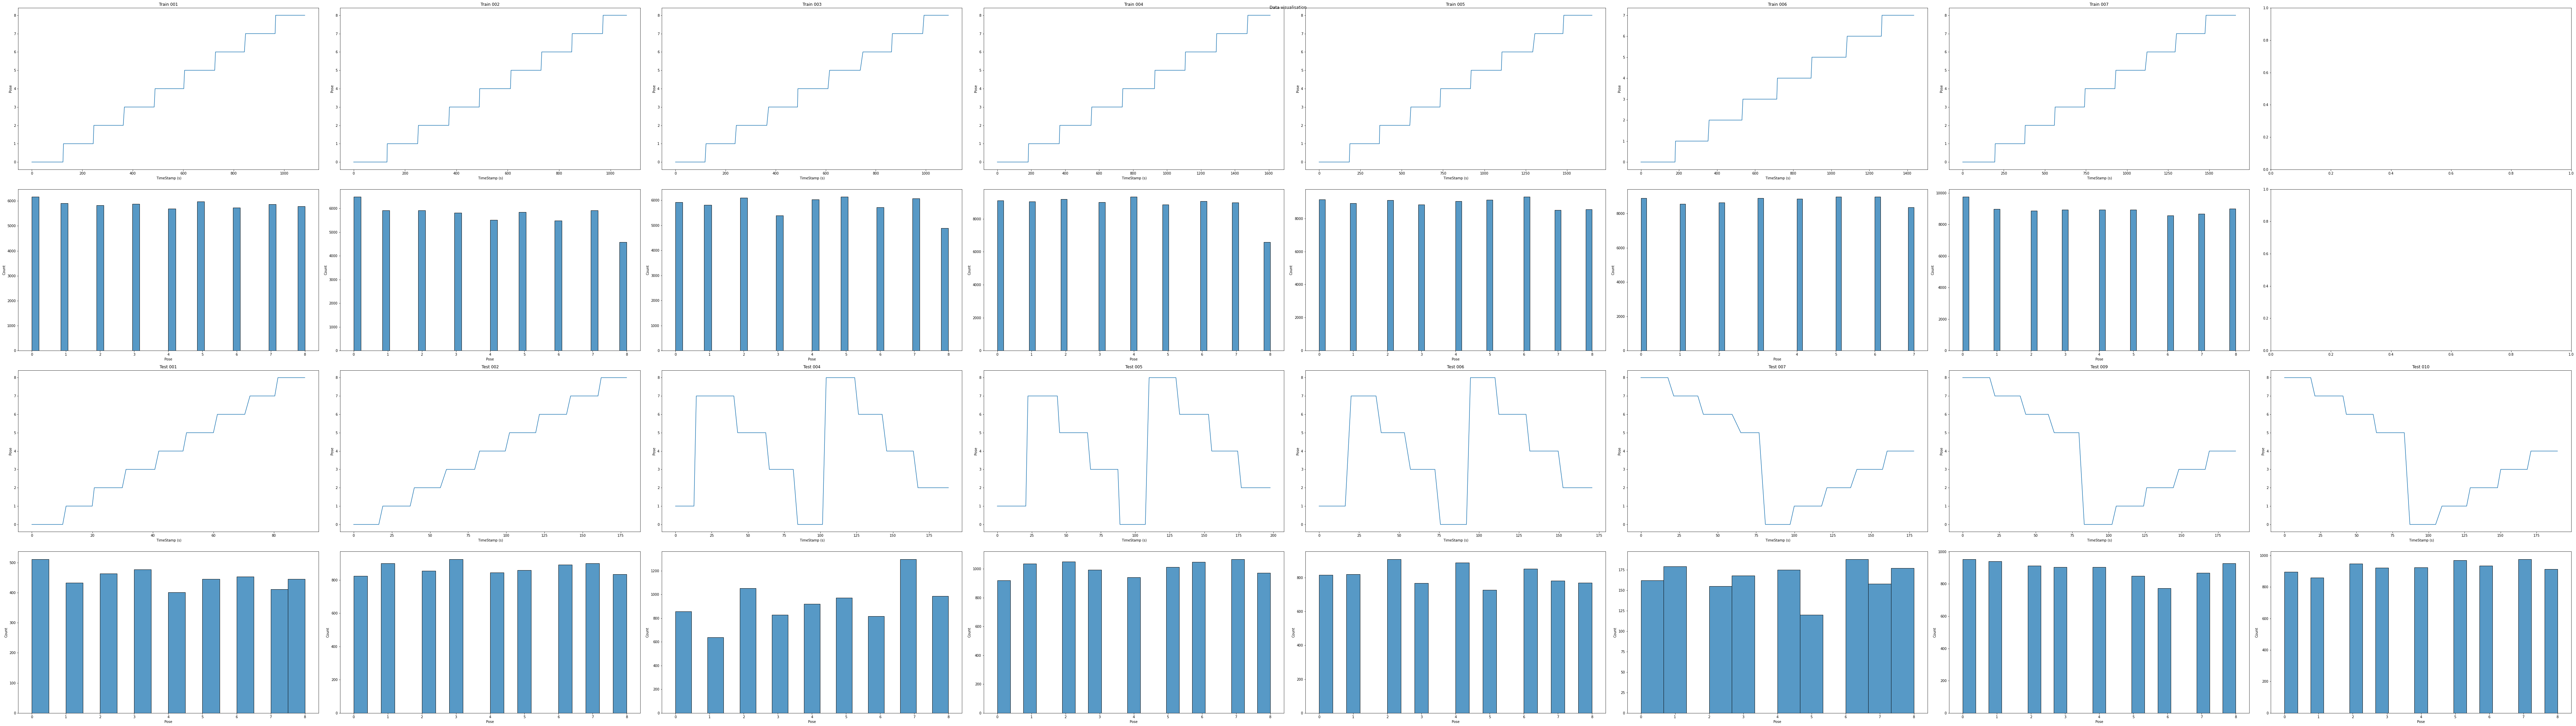

In [ ]:
cols = []
height=30
width=(height/2)*len(train_arr)
fig, axes = plt.subplots(4, max(len(training_files), len(testing_files)), figsize=(width, height))
fig.suptitle('Data visualisation')
# Train
for i, elem in enumerate(train_arr):
    sns.lineplot(ax=axes[0, i], data=elem.df, x=" TimeStamp (s)", y='Pose')
    sns.histplot(ax=axes[1, i], data=elem.df["Pose"])
    cols.append(f'Train 00{i+1}')    
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
# Test
cols=[]
for i, key in enumerate(test_dict):
    sns.lineplot(ax=axes[2, i], data=test_dict[key], x=" TimeStamp (s)", y='Pose')
    sns.histplot(ax=axes[3, i], data=test_dict[key]["Pose"])
    cols.append(f'Test {key}') 
for ax, col in zip(axes[2], cols):
    ax.set_title(col)
fig.tight_layout()
plt.show()